I will update this kernel regularly! 


Currently this kernel contains:
1. Defining the metadata of silly column names
    - useful to select specific variables for analysis, visualization, modelling etc.
2. Distributions of target 0,1 depending on columns
    - Discovers weird column : 'wheezy-copper-turtle-magic'
3. Look over statistics of the other columns sharing partial name of 'wheezy-copper-turtle-magic'

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
print("train set : ",train.shape)
print("test set : ",test.shape)

train set :  (262144, 258)
test set :  (131073, 257)


In [3]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [4]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,dorky-purple-kiwi-hint,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,1c13f2701648e0b0d46d8a2a5a131a53,-5.490030,0.593976,1.532732,-0.361234,-0.155282,-1.340582,1.626819,4.280084,-0.340155,-0.653070,2.817394,1.211543,-0.819354,-0.019935,0.634466,-1.604789,0.756771,0.451960,0.309252,-4.628353,-0.270163,-0.183827,0.099529,0.719685,-1.077965,-1.704726,0.263344,1.183083,-1.967262,-0.364729,-1.553005,0.667643,-1.647120,-0.118086,1.095897,-3.725086,0.571565,5.407131,1.599479,...,-0.007170,-0.723353,-0.317083,3.892687,0.732599,-0.829353,-1.281645,5.256029,0.484761,0.315440,-1.256456,-0.065537,0.243787,-0.085292,0.293226,-0.727176,-0.026991,-0.452266,1.733475,-0.511201,-0.913642,-2.237558,-1.607618,-0.497308,0.004124,-1.854472,1.499102,-0.701304,-0.573827,0.121455,0.386831,0.817764,-1.215121,0.238812,-0.507346,1.360599,-1.743894,1.412043,-0.562730,-0.237948
1,ba88c155ba898fc8b5099893036ef205,0.571698,0.495494,1.133975,-0.315875,-2.142458,-0.478650,-1.458941,0.977352,0.159189,0.425304,1.366214,-1.097810,-0.128929,-0.563375,-0.389307,-0.167991,0.314843,0.530220,-0.512497,0.526404,1.612939,-0.800211,0.692056,2.541566,0.290910,-0.726153,1.307040,0.964062,0.235339,3.553998,-0.769491,-1.706831,0.227793,-1.027914,1.359388,-1.296281,0.216550,0.166792,-1.361746,...,8.867017,0.145251,-2.429107,-1.994984,0.692641,-0.922336,-0.442788,-0.357402,0.606270,-0.144259,-0.019312,0.132073,-1.038829,-0.361597,-0.019181,0.656320,-0.029080,-0.263428,-1.674349,0.237658,-0.539413,3.683862,0.341788,0.321800,1.919056,-0.680074,-0.851474,-0.802017,1.984299,0.606214,-1.120400,-0.953432,0.266619,-2.088512,0.252637,-1.034676,-0.804765,0.639112,1.172667,-1.666513
2,7cbab5cea99169139e7e6d8ff74ebb77,0.478202,-1.429985,0.41

# Make metadata of the column names 
- I got this idea to make a metadata from this kernel : https://www.kaggle.com/bertcarremans/data-preparation-exploration

In [5]:
data = []
for col in test.columns:
    # parse column names
    if col not in ['id', 'target']:
        col_split_list = col.split("-")
        
        # Initialize keep to True
#         keep = True
    
        # Create dictionary that contains all the metadata for each columns
        col_dict = {
            'feature_name' : col,
            'col_name_1' : col_split_list[0],
            'col_name_2' : col_split_list[1],
            'col_name_3' : col_split_list[2],
            'col_name_4' : col_split_list[3]
#             'keep' : keep
        }
        data.append(col_dict)
    
# meta = pd.DataFrame(data, columns = ['feature_name', 'col_name_1', 'col_name_2', 'col_name_3', 'col_name_4', 'keep'])
    
meta = pd.DataFrame(data, columns = ['feature_name', 'col_name_1', 'col_name_2', 'col_name_3', 'col_name_4'])
meta.set_index('feature_name', inplace=True)

In [6]:
meta

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
muggy-smalt-axolotl-pembus,muggy,smalt,axolotl,pembus
dorky-peach-sheepdog-ordinal,dorky,peach,sheepdog,ordinal
slimy-seashell-cassowary-goose,slimy,seashell,cassowary,goose
snazzy-harlequin-chicken-distraction,snazzy,harlequin,chicken,distraction
frumpy-smalt-mau-ordinal,frumpy,smalt,mau,ordinal
stealthy-beige-pinscher-golden,stealthy,beige,pinscher,golden
chummy-cream-tarantula-entropy,chummy,cream,tarantula,entropy
hazy-emerald-cuttlefish-unsorted,hazy,emerald,cuttlefish,unsorted
nerdy-indigo-wolfhound-sorted,nerdy,indigo,wolfhound,sorted


# unique value counts of each column name parts

In [7]:
print('length of unique values of each part of column names:', 
      '\n', 'col_name_1 :',len(meta.col_name_1.unique()), 
      '\n', 'col_name_2 :',len(meta.col_name_2.unique()), 
      '\n', 'col_name_3 :',len(meta.col_name_3.unique()), 
      '\n', 'col_name_4 :',len(meta.col_name_4.unique()))

length of unique values of each part of column names: 
 col_name_1 : 85 
 col_name_2 : 103 
 col_name_3 : 173 
 col_name_4 : 26


In [8]:
meta.col_name_1.value_counts().head(10)

gloppy    7
beady     7
snazzy    7
dorky     7
slimy     7
cranky    6
lousy     6
blurry    6
greasy    6
skinny    6
Name: col_name_1, dtype: int64

In [9]:
meta.col_name_2.value_counts().head(10)

champagne    5
asparagus    5
purple       5
harlequin    5
copper       5
red          5
tangerine    5
plum         5
auburn       5
cream        5
Name: col_name_2, dtype: int64

In [10]:
meta.col_name_3.value_counts().head(10)

sloth        4
eel          3
maltese      3
fowl         3
insect       3
donkey       3
oyster       3
wolfhound    3
otter        3
iguana       3
Name: col_name_3, dtype: int64

In [11]:
meta.col_name_4.value_counts().head(15)

important      19
entropy        15
grandmaster    15
unsorted       15
sorted         15
expert         12
hint           12
novice         11
contributor    10
ordinal        10
distraction    10
dataset        10
kernel         10
discard         9
gaussian        9
Name: col_name_4, dtype: int64

# unique list of each column name parts

In [12]:
meta['col_name_1'].unique()

array(['muggy', 'dorky', 'slimy', 'snazzy', 'frumpy', 'stealthy',
       'chummy', 'hazy', 'nerdy', 'leaky', 'ugly', 'shaggy', 'flaky',
       'squirrely', 'freaky', 'lousy', 'bluesy', 'baggy', 'greasy',
       'cranky', 'snippy', 'flabby', 'goopy', 'homey', 'homely', 'hasty',
       'blurry', 'snoopy', 'stinky', 'bumpy', 'slaphappy', 'messy',
       'geeky', 'crabby', 'beady', 'pasty', 'snappy', 'breezy', 'sunny',
       'cheeky', 'wiggy', 'flimsy', 'lanky', 'scanty', 'grumpy', 'chewy',
       'crappy', 'clammy', 'tasty', 'thirsty', 'gloppy', 'gamy', 'hilly',
       'woozy', 'squeaky', 'lovely', 'paltry', 'smelly', 'pokey',
       'skanky', 'zippy', 'sleazy', 'queasy', 'foggy', 'wheezy', 'droopy',
       'cozy', 'skinny', 'seedy', 'stuffy', 'jumpy', 'trippy', 'woolly',
       'gimpy', 'randy', 'silly', 'craggy', 'skimpy', 'nippy', 'whiny',
       'boozy', 'pretty', 'sickly', 'shabby', 'surly'], dtype=object)

In [13]:
meta['col_name_2'].unique()

array(['smalt', 'peach', 'seashell', 'harlequin', 'beige', 'cream',
       'emerald', 'indigo', 'amaranth', 'tangerine', 'silver',
       'chocolate', 'tan', 'plum', 'rose', 'copper', 'scarlet',
       'cinnamon', 'cardinal', 'auburn', 'sepia', 'brass', 'eggplant',
       'ruby', 'blue', 'wisteria', 'maroon', 'tomato', 'mauve', 'pumpkin',
       'teal', 'goldenrod', 'aquamarine', 'gamboge', 'persimmon',
       'mustard', 'red', 'magnolia', 'chestnut', 'champagne', 'flax',
       'viridian', 'amber', 'zucchini', 'myrtle', 'lemon', 'pear',
       'xanthic', 'turquoise', 'lilac', 'amethyst', 'lime', 'pink',
       'periwinkle', 'crimson', 'burgundy', 'purple', 'rust', 'cerise',
       'khaki', 'malachite', 'violet', 'sangria', 'magenta', 'russet',
       'apricot', 'cobalt', 'platinum', 'denim', 'yellow', 'sapphire',
       'bronze', 'green', 'thistle', 'buff', 'razzmatazz', 'charcoal',
       'ultramarine', 'puce', 'carmine', 'gold', 'asparagus', 'ivory',
       'orange', 'vermilion', 'c

In [14]:
meta['col_name_3'].unique()

array(['axolotl', 'sheepdog', 'cassowary', 'chicken', 'mau', 'pinscher',
       'tarantula', 'cuttlefish', 'wolfhound', 'lizard', 'chihuahua',
       'indri', 'beetle', 'sheep', 'angelfish', 'penguin', 'wallaby',
       'oriole', 'hound', 'bonobo', 'dogfish', 'vole', 'coral', 'fowl',
       'bombay', 'bulldog', 'oyster', 'blue', 'armadillo', 'ragdoll',
       'wolverine', 'moorhen', 'otter', 'bat', 'affenpinscher', 'rat',
       'caterpillar', 'newt', 'collie', 'weasel', 'guppy', 'bullfrog',
       'alligator', 'sloth', 'moth', 'kudu', 'wasp', 'okapi', 'quoll',
       'shrew', 'walrus', 'schnauzer', 'termite', 'dragonfly', 'kakapo',
       'quetzal', 'capuchin', 'eel', 'iguana', 'zonkey', 'fousek',
       'javanese', 'leopard', 'gorilla', 'malamute', 'birman', 'donkey',
       'lionfish', 'llama', 'emu', 'koala', 'saola', 'neanderthal',
       'horse', 'mammoth', 'duck', 'peccary', 'hippopotamus',
       'grasshopper', 'dolphin', 'gharial', 'frog', 'ostrich', 'akbash',
       'bison', 

In [15]:
meta['col_name_4'].unique()

array(['pembus', 'ordinal', 'goose', 'distraction', 'golden', 'entropy',
       'unsorted', 'sorted', 'important', 'fimbus', 'grandmaster',
       'sumble', 'noise', 'discard', 'dummy', 'fepid', 'contributor',
       'learn', 'dataset', 'master', 'expert', 'kernel', 'hint', 'novice',
       'gaussian', 'magic'], dtype=object)

# Example to extract each type of columns

In [16]:
meta[(meta.col_name_4 == 'important')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
ugly-tangerine-chihuahua-important,ugly,tangerine,chihuahua,important
bumpy-amaranth-armadillo-important,bumpy,amaranth,armadillo,important
geeky-pumpkin-moorhen-important,geeky,pumpkin,moorhen,important
flimsy-chestnut-guppy-important,flimsy,chestnut,guppy,important
chewy-myrtle-wasp-important,chewy,myrtle,wasp,important
clammy-scarlet-emu-important,clammy,scarlet,emu,important
smelly-yellow-akbash-important,smelly,yellow,akbash,important
foggy-denim-hyrax-important,foggy,denim,hyrax,important
dorky-turquoise-maltese-important,dorky,turquoise,maltese,important


In [17]:
pd.DataFrame({'count': meta.groupby(['col_name_4', 'col_name_1'])['col_name_4'].size()}).reset_index()

,col_name_4,col_name_1,count
0,contributor,gloppy,1
1,contributor,greasy,1
2,contributor,hasty,1
3,contributor,lovely,1
4,contributor,messy,1
5,contributor,skanky,2
6,contributor,snazzy,1
7,contributor,woozy,1
8,contributor,zippy,1
9,dataset,blurry,1


# Target distribution of group of column names

In [18]:
meta[(meta.col_name_4 == 'important')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
ugly-tangerine-chihuahua-important,ugly,tangerine,chihuahua,important
bumpy-amaranth-armadillo-important,bumpy,amaranth,armadillo,important
geeky-pumpkin-moorhen-important,geeky,pumpkin,moorhen,important
flimsy-chestnut-guppy-important,flimsy,chestnut,guppy,important
chewy-myrtle-wasp-important,chewy,myrtle,wasp,important
clammy-scarlet-emu-important,clammy,scarlet,emu,important
smelly-yellow-akbash-important,smelly,yellow,akbash,important
foggy-denim-hyrax-important,foggy,denim,hyrax,important
dorky-turquoise-maltese-important,dorky,turquoise,maltese,important


In [19]:
train_4_important = train[['ugly-tangerine-chihuahua-important','muggy-turquoise-donkey-important'] ]

In [20]:
temp = meta[(meta.col_name_4 == 'important')].index.tolist() + ['target']

In [21]:
train_4_important = train[temp]

In [22]:
train_4_important.shape

(262144, 20)

In [23]:
train_4_important.head()

,ugly-tangerine-chihuahua-important,bumpy-amaranth-armadillo-important,geeky-pumpkin-moorhen-important,flimsy-chestnut-guppy-important,chewy-myrtle-wasp-important,clammy-scarlet-emu-important,smelly-yellow-akbash-important,foggy-denim-hyrax-important,dorky-turquoise-maltese-important,gloppy-mauve-bonobo-important,wiggy-cinnamon-gecko-important,nippy-jade-squirt-important,woolly-cinnabar-schnauzer-important,lanky-aqua-bullfrog-important,sickly-denim-oriole-important,blurry-green-dodo-important,droopy-cardinal-impala-important,snappy-purple-bobcat-important,muggy-turquoise-donkey-important,target
0,0.575964,-1.154024,-1.663626,-0.155122,-1.204695,0.039764,-1.424420,0.600586,-0.514233,-1.172032,2.862423,-0.097177,5.543320,0.388636,0.182350,0.411329,-0.428974,-0.170667,0.678772,0
1,-1.280579,-0.144646,-0.600107,0.535743,1.363319,0.197195,-4.323965,1.525436,0.972464,3.628937,0.769349,1.610341,1.306083,1.054285,2.317404,0.383525,0.158572,-1.461564,0.931258,0
2,-2.203397,-0.584417,0.010756,0.973093,5.057522,-1.436294,-0.597690,-0.871585,5.143568,-0.861892,0.212408,1.345180,0.643706,-3.533002,-1.819291,-1.569518,1.251046,-0.851292,-0.218274,1
3,0.003159,0.223452,0.441111,0.983082,-4.153366,1.320893,-0.416075,-0.860890,-0.306313,0.895879,-1.542583,-1.833676,2.246329,0.152226,-2.398219,0.116920,-1.570599,0.215861,-0.794327,0
4,0.629773,-3.301453,-0.368194,-1.049263,0.036798,0.077336,-0.098688,0.428461,0.406730,0.461479,-0.778917,-0.922905,0.392723,1.225314,0.038139,0.180993,0.258885,0.218560,-0.264292,0


# Visualization

## Target distribution

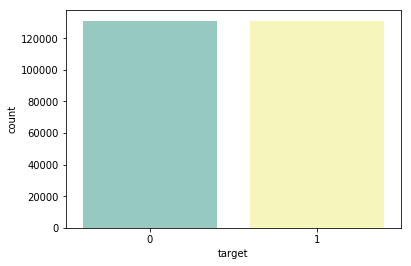

In [24]:
sns.countplot(train['target'], palette='Set3')

- 0,1 distribution plots of train data for each column
- code from : https://www.kaggle.com/senkin13/eda-starter, figsize modified

In [25]:
feats = [f for f in train.columns if f not in ['id','target']]
def plot_feature_distribution(df1, df2, label1, label2, features, row, col):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    ratio = int(row/col/2)
    fig, ax = plt.subplots(row,col,figsize=(15,15*(ratio+1)))

    for feature in features:
        i += 1
        plt.subplot(row,col,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

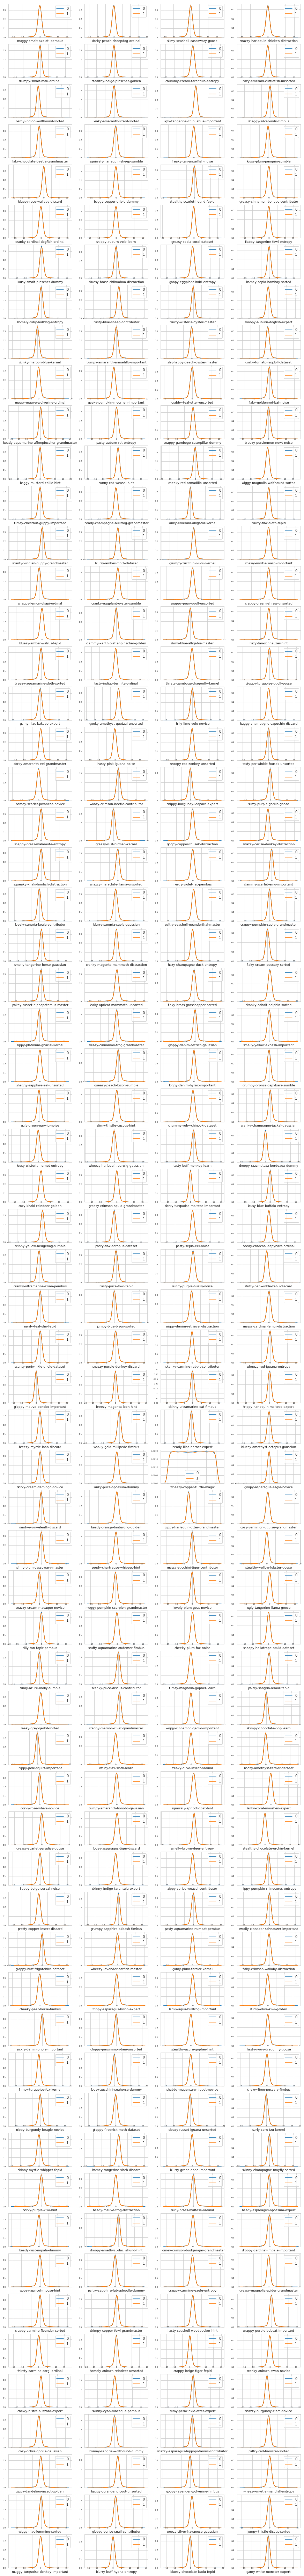

In [26]:
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = train[feats].columns.values
plot_feature_distribution(t0, t1, '0', '1', features, 64,4)   

- notice that 'wheezy-copper-turtle-magic' shows different pattern from other features

- statistics of the columns starting with 'wheezy'

In [27]:
meta[(meta.col_name_1 == 'wheezy')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
wheezy-harlequin-earwig-gaussian,wheezy,harlequin,earwig,gaussian
wheezy-red-iguana-entropy,wheezy,red,iguana,entropy
wheezy-copper-turtle-magic,wheezy,copper,turtle,magic
wheezy-lavender-catfish-master,wheezy,lavender,catfish,master
wheezy-myrtle-mandrill-entropy,wheezy,myrtle,mandrill,entropy


In [28]:
train[meta[(meta.col_name_1 == 'wheezy')].index].describe()

,wheezy-harlequin-earwig-gaussian,wheezy-red-iguana-entropy,wheezy-copper-turtle-magic,wheezy-lavender-catfish-master,wheezy-myrtle-mandrill-entropy
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.010318,-0.008401,255.602486,-0.000896,-0.002670
std,1.600180,1.757266,147.920785,1.730425,1.799308
min,-13.768432,-17.080807,0.000000,-16.811929,-16.740804
25%,-0.747196,-0.779942,127.000000,-0.767382,-0.782944
50%,-0.002221,-0.001111,256.000000,0.002344,-0.002239
75%,0.750622,0.772606,384.000000,0.771691,0.786180
max,15.893562,15.484624,511.000000,15.296874,15.511936


In [29]:
test[meta[(meta.col_name_1 == 'wheezy')].index].describe()

,wheezy-harlequin-earwig-gaussian,wheezy-red-iguana-entropy,wheezy-copper-turtle-magic,wheezy-lavender-catfish-master,wheezy-myrtle-mandrill-entropy
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,0.005078,-0.013676,255.494610,-0.006618,0.005354
std,1.605591,1.773944,147.726458,1.719142,1.813079
min,-16.134500,-15.215374,0.000000,-15.879805,-15.810240
25%,-0.748013,-0.788351,128.000000,-0.775708,-0.780773
50%,0.005403,-0.003599,255.000000,-0.001484,0.004962
75%,0.750468,0.775882,384.000000,0.768335,0.792530
max,15.481330,15.216084,511.000000,16.217899,18.054682


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

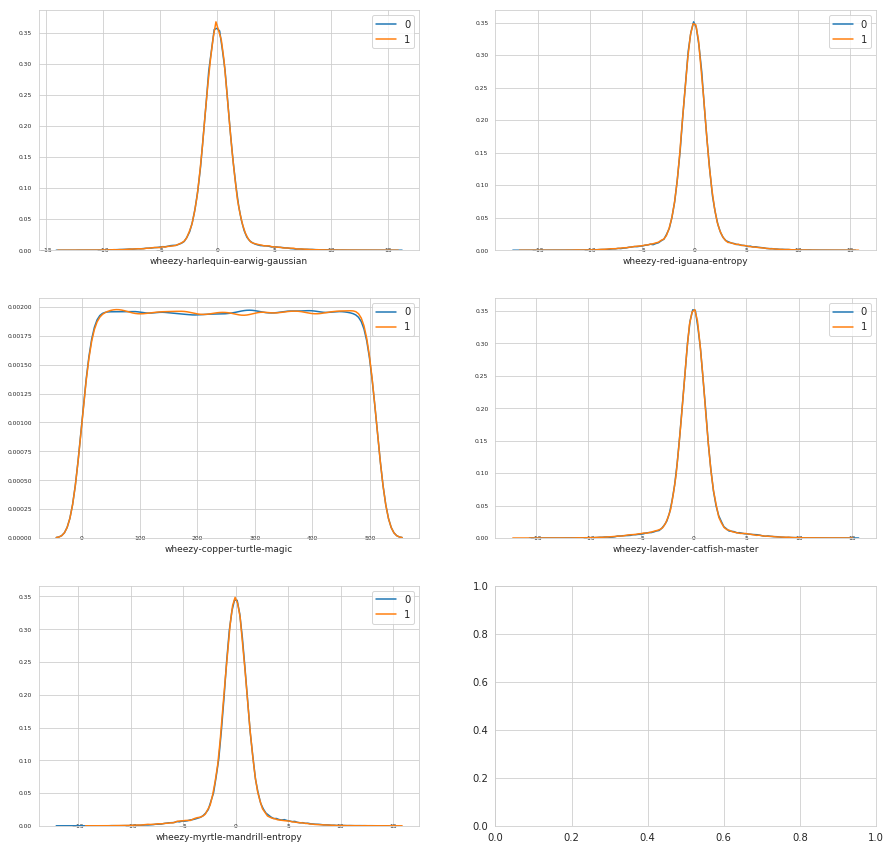

In [30]:
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = meta[(meta.col_name_1 == 'wheezy')].index
plot_feature_distribution(t0, t1, '0', '1', features,3,2) 

- statistics with columns which col_name_2==copper

In [31]:
meta[(meta.col_name_2 == 'copper')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
baggy-copper-oriole-dummy,baggy,copper,oriole,dummy
goopy-copper-fousek-distraction,goopy,copper,fousek,distraction
wheezy-copper-turtle-magic,wheezy,copper,turtle,magic
pretty-copper-insect-discard,pretty,copper,insect,discard
skimpy-copper-fowl-grandmaster,skimpy,copper,fowl,grandmaster


In [32]:
train[meta[(meta.col_name_2 == 'copper')].index].describe()

,baggy-copper-oriole-dummy,goopy-copper-fousek-distraction,wheezy-copper-turtle-magic,pretty-copper-insect-discard,skimpy-copper-fowl-grandmaster
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.000990,0.010956,255.602486,0.008633,0.007972
std,1.651425,1.726721,147.920785,1.791380,1.845592
min,-16.657590,-17.317512,0.000000,-15.734520,-17.071420
25%,-0.755598,-0.766827,127.000000,-0.780031,-0.787209
50%,-0.000431,0.002110,256.000000,0.003366,0.002720
75%,0.759202,0.776688,384.000000,0.787801,0.796490
max,17.051746,17.155691,511.000000,17.167916,16.462407


In [33]:
test[meta[(meta.col_name_2 == 'copper')].index].describe()

,baggy-copper-oriole-dummy,goopy-copper-fousek-distraction,wheezy-copper-turtle-magic,pretty-copper-insect-discard,skimpy-copper-fowl-grandmaster
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,0.003780,0.012393,255.494610,0.011488,0.002001
std,1.646912,1.721527,147.726458,1.792416,1.844317
min,-16.193247,-15.435069,0.000000,-15.351565,-18.977523
25%,-0.747915,-0.770451,128.000000,-0.777330,-0.786238
50%,0.004801,0.005564,255.000000,0.009499,-0.003579
75%,0.763095,0.776995,384.000000,0.792308,0.789727
max,15.707031,16.152005,511.000000,16.087088,15.786199


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

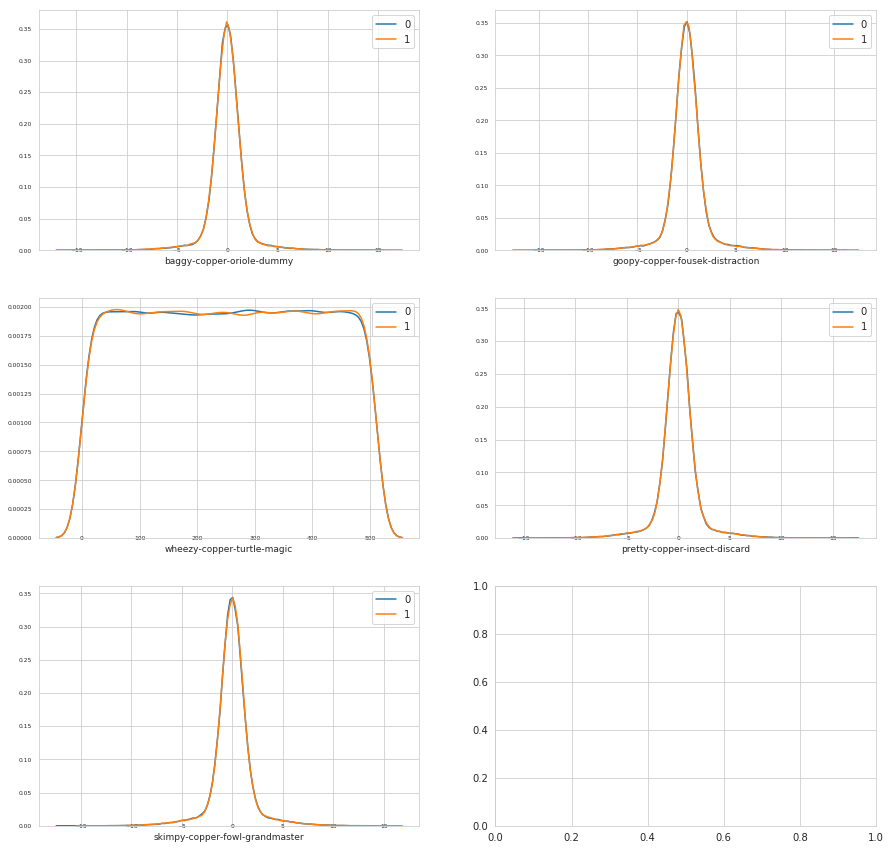

In [34]:
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = meta[(meta.col_name_2 == 'copper')].index
plot_feature_distribution(t0, t1, '0', '1', features,3,2) 

- Only one column has 3rd part ==turtle or 4th part ==magic 

In [35]:
meta[(meta.col_name_3 == 'turtle')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
wheezy-copper-turtle-magic,wheezy,copper,turtle,magic


In [36]:
meta[(meta.col_name_4 == 'magic')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
wheezy-copper-turtle-magic,wheezy,copper,turtle,magic


In [37]:
meta[(meta.col_name_4 == 'important')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
ugly-tangerine-chihuahua-important,ugly,tangerine,chihuahua,important
bumpy-amaranth-armadillo-important,bumpy,amaranth,armadillo,important
geeky-pumpkin-moorhen-important,geeky,pumpkin,moorhen,important
flimsy-chestnut-guppy-important,flimsy,chestnut,guppy,important
chewy-myrtle-wasp-important,chewy,myrtle,wasp,important
clammy-scarlet-emu-important,clammy,scarlet,emu,important
smelly-yellow-akbash-important,smelly,yellow,akbash,important
foggy-denim-hyrax-important,foggy,denim,hyrax,important
dorky-turquoise-maltese-important,dorky,turquoise,maltese,important


In [38]:
train[meta[(meta.col_name_4 == 'important')].index].describe()

,ugly-tangerine-chihuahua-important,bumpy-amaranth-armadillo-important,geeky-pumpkin-moorhen-important,flimsy-chestnut-guppy-important,chewy-myrtle-wasp-important,clammy-scarlet-emu-important,smelly-yellow-akbash-important,foggy-denim-hyrax-important,dorky-turquoise-maltese-important,gloppy-mauve-bonobo-important,wiggy-cinnamon-gecko-important,nippy-jade-squirt-important,woolly-cinnabar-schnauzer-important,lanky-aqua-bullfrog-important,sickly-denim-oriole-important,blurry-green-dodo-important,droopy-cardinal-impala-important,snappy-purple-bobcat-important,muggy-turquoise-donkey-important
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,-0.001629,-0.000040,0.007037,0.003617,0.002179,0.003133,0.004213,-0.012810,-0.008514,0.012302,-0.002396,-0.002326,-0.008177,-0.009459,0.004587,-0.001247,-0.008141,0.010641,0.002351
std,1.682552,1.820864,1.813789,1.820393,1.652159,1.805634,1.654715,1.778808,1.678436,1.692395,1.656447,1.704468,1.692545,1.829203,1.676412,1.816563,1.734635,1.806801,1.742284
min,-19.733308,-16.233520,-15.571176,-16.191485,-15.648989,-19.572870,-15.631673,-19.177631,-17.075535,-16.084418,-16.046640,-15.694457,-16.715673,-16.156013,-18.729543,-16.288798,-15.536694,-18.289074,-16.965775
25%,-0.761005,-0.787004,-0.783456,-0.787364,-0.756000,-0.791601,-0.754314,-0.782295,-0.763056,-0.754760,-0.760182,-0.766593,-0.768637,-0.793611,-0.756311,-0.785611,-0.777279,-0.785432,-0.770457
50%,0.000157,0.000990,0.006661,0.000942,0.003013,-0.002194,-0.003781,-0.005112,-0.002720,0.008028,-0.001966,-0.002587,-0.003475,-0.002087,0.003013,0.000203,-0.009198,0.000898,-0.000617
75%,0.759293,0.783732,0.793304,0.790260,0.760335,0.783979,0.757184,0.774750,0.751724,0.769533,0.755347,0.762609,0.761480,0.790834,0.760464,0.788519,0.764319,0.792034,0.773100
max,15.558533,16.199981,18.468209,16.104960,15.716950,15.893556,14.961133,17.181224,19.645549,21.075829,17.851964,18.977439,15.861337,15.832499,15.966576,16.656203,14.597412,15.037548,16.212146


In [39]:
test[meta[(meta.col_name_4 == 'important')].index].describe()

,ugly-tangerine-chihuahua-important,bumpy-amaranth-armadillo-important,geeky-pumpkin-moorhen-important,flimsy-chestnut-guppy-important,chewy-myrtle-wasp-important,clammy-scarlet-emu-important,smelly-yellow-akbash-important,foggy-denim-hyrax-important,dorky-turquoise-maltese-important,gloppy-mauve-bonobo-important,wiggy-cinnamon-gecko-important,nippy-jade-squirt-important,woolly-cinnabar-schnauzer-important,lanky-aqua-bullfrog-important,sickly-denim-oriole-important,blurry-green-dodo-important,droopy-cardinal-impala-important,snappy-purple-bobcat-important,muggy-turquoise-donkey-important
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,0.008928,-0.000145,0.000392,0.007314,-0.005947,0.001231,0.005614,-0.009632,-0.012842,0.009114,-0.001982,-0.003610,-0.010990,-0.006121,0.001532,-0.008187,-0.009315,0.003498,0.002057
std,1.671131,1.819759,1.819690,1.798236,1.662124,1.822774,1.639897,1.787200,1.676977,1.692248,1.662648,1.710040,1.698770,1.834611,1.665610,1.820468,1.740694,1.814459,1.743466
min,-15.091650,-17.750802,-15.373313,-16.235343,-14.526426,-15.167645,-16.625427,-18.440097,-17.272284,-17.107933,-15.423317,-16.638173,-15.949495,-15.094782,-15.661633,-15.078964,-14.058213,-15.758981,-18.468645
25%,-0.756131,-0.794521,-0.785417,-0.781609,-0.763599,-0.779661,-0.749353,-0.781957,-0.768710,-0.757759,-0.761203,-0.768717,-0.769409,-0.793056,-0.765721,-0.790907,-0.777378,-0.786797,-0.765511
50%,0.001552,-0.003324,0.002564,0.004625,0.004290,0.000151,0.002573,-0.003079,-0.008205,0.003901,-0.003331,-0.002884,-0.007059,0.001979,0.003815,-0.001675,-0.004640,-0.001681,0.005168
75%,0.764330,0.782025,0.793666,0.785736,0.760199,0.785746,0.757970,0.778468,0.749351,0.767303,0.752788,0.765015,0.758755,0.792708,0.758417,0.783093,0.766665,0.796524,0.774573
max,14.207673,17.015652,14.517743,16.696784,16.805855,15.736519,15.028284,15.534818,15.838644,14.756884,15.879232,17.892711,15.974699,17.978517,17.049750,13.699553,16.063229,15.171393,13.652250


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

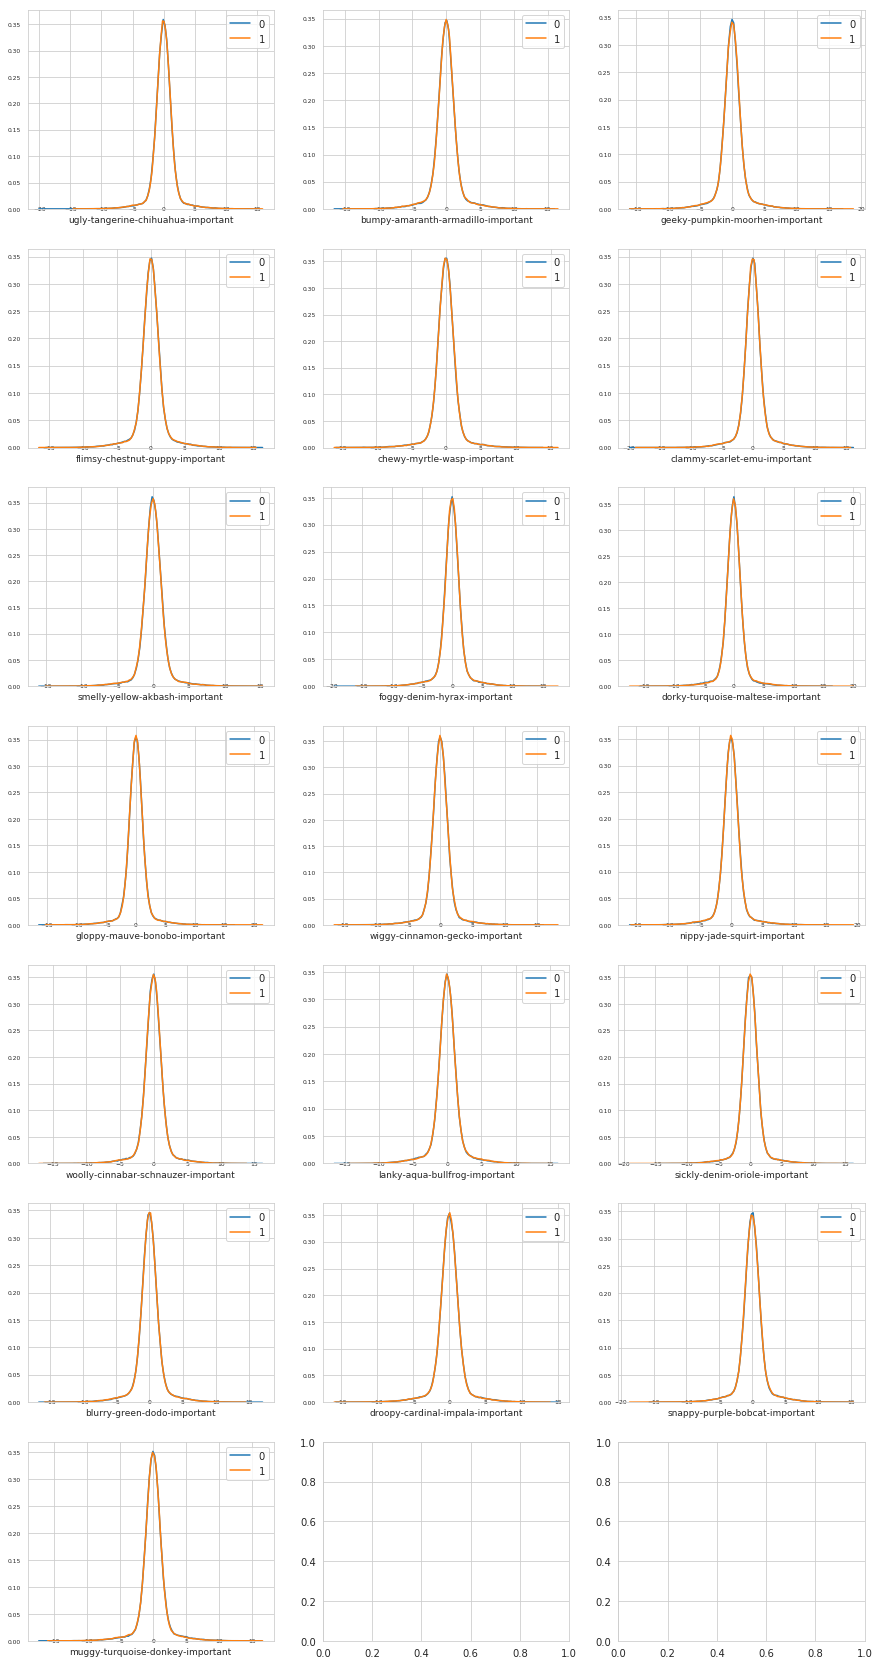

In [40]:
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = meta[(meta.col_name_4 == 'important')].index
plot_feature_distribution(t0, t1, '0', '1', features,7,3) 

In [41]:
meta[(meta.col_name_4 == 'hint')]

,col_name_1,col_name_2,col_name_3,col_name_4
feature_name,,,,
baggy-mustard-collie-hint,baggy,mustard,collie,hint
sunny-red-weasel-hint,sunny,red,weasel,hint
hazy-tan-schnauzer-hint,hazy,tan,schnauzer,hint
slimy-thistle-cuscus-hint,slimy,thistle,cuscus,hint
breezy-magenta-loon-hint,breezy,magenta,loon,hint
seedy-chartreuse-whippet-hint,seedy,chartreuse,whippet,hint
squirrely-apricot-goat-hint,squirrely,apricot,goat,hint
stealthy-azure-gopher-hint,stealthy,azure,gopher,hint
dorky-purple-kiwi-hint,dorky,purple,kiwi,hint


In [42]:
train[meta[(meta.col_name_4 == 'hint')].index].describe()

,baggy-mustard-collie-hint,sunny-red-weasel-hint,hazy-tan-schnauzer-hint,slimy-thistle-cuscus-hint,breezy-magenta-loon-hint,seedy-chartreuse-whippet-hint,squirrely-apricot-goat-hint,stealthy-azure-gopher-hint,dorky-purple-kiwi-hint,droopy-amethyst-dachshund-hint,woozy-apricot-moose-hint,hasty-seashell-woodpecker-hint
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,-0.003879,-0.006045,-0.005483,-0.002279,-0.007024,0.006137,-0.005780,0.006896,-0.004227,0.011217,0.003521,-0.003604
std,1.795944,1.812823,1.915849,1.807470,1.713687,1.737796,1.771552,1.773480,1.725313,1.873766,1.691880,1.808498
min,-18.700593,-19.589393,-16.436130,-16.315958,-17.918030,-16.273133,-15.936419,-14.875404,-17.276733,-19.188606,-14.945959,-16.837020
25%,-0.780819,-0.787176,-0.816203,-0.783835,-0.769787,-0.767406,-0.778668,-0.771583,-0.772624,-0.796242,-0.757839,-0.789172
50%,-0.002669,-0.005894,-0.003051,0.000562,-0.003864,0.004058,-0.004833,0.005629,-0.000343,0.004685,0.003729,-0.003037
75%,0.779141,0.778585,0.808918,0.779831,0.763813,0.770528,0.772064,0.780042,0.770280,0.806502,0.762854,0.789162
max,18.588235,17.238856,16.177474,15.701671,18.958303,16.554476,14.622198,16.621014,15.695715,16.399846,15.010216,16.366581


In [43]:
test[meta[(meta.col_name_4 == 'hint')].index].describe()

,baggy-mustard-collie-hint,sunny-red-weasel-hint,hazy-tan-schnauzer-hint,slimy-thistle-cuscus-hint,breezy-magenta-loon-hint,seedy-chartreuse-whippet-hint,squirrely-apricot-goat-hint,stealthy-azure-gopher-hint,dorky-purple-kiwi-hint,droopy-amethyst-dachshund-hint,woozy-apricot-moose-hint,hasty-seashell-woodpecker-hint
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,-0.006579,0.003011,-0.013836,-0.004337,-0.015715,0.007425,0.002176,0.004707,0.006470,0.020735,0.007151,0.000142
std,1.781774,1.817165,1.911658,1.807948,1.710527,1.755496,1.772118,1.777494,1.731586,1.879771,1.687806,1.796201
min,-16.023883,-16.471837,-16.196724,-14.740193,-15.619963,-16.729848,-15.048598,-13.972722,-17.988540,-14.206816,-14.875082,-16.049497
25%,-0.785759,-0.783846,-0.811193,-0.785160,-0.776982,-0.769504,-0.771652,-0.779489,-0.765781,-0.791985,-0.763019,-0.788305
50%,-0.000743,0.001580,-0.001972,0.000595,-0.007220,0.000819,0.002369,-0.002278,0.002970,0.008946,0.004365,-0.005482
75%,0.773694,0.788085,0.807086,0.789479,0.760395,0.776193,0.772255,0.779201,0.777454,0.809672,0.763365,0.779334
max,15.325359,16.138481,16.652280,16.668689,14.360065,18.387618,15.791242,15.127863,16.694635,16.119908,15.310143,15.020270


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

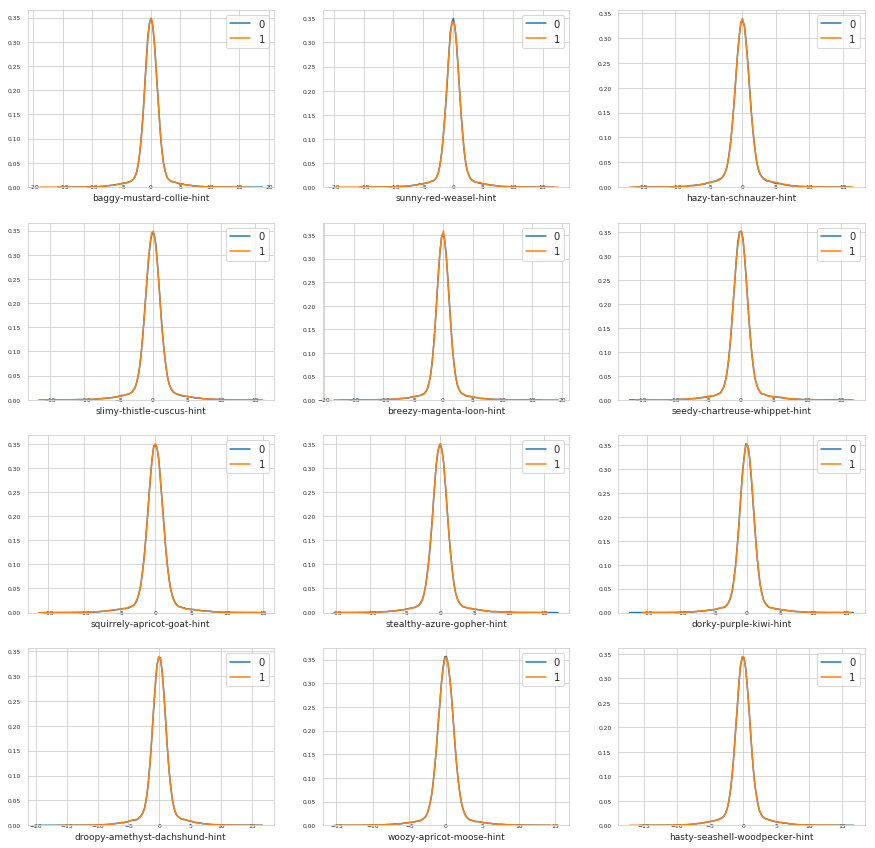

In [44]:
t0 = train[feats].loc[train['target'] == 0]
t1 = train[feats].loc[train['target'] == 1]
features = meta[(meta.col_name_4 == 'hint')].index
plot_feature_distribution(t0, t1, '0', '1', features,4,3) 

## heatmap

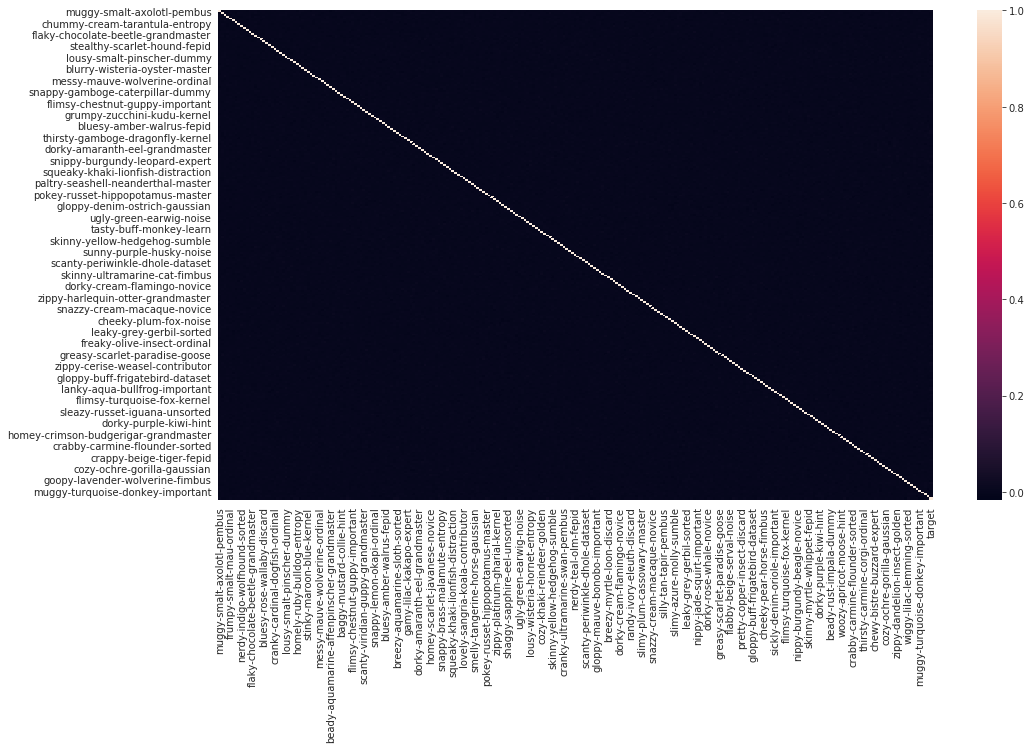

In [45]:
plt.figure(figsize = [16,9])
sns.heatmap(train.corr())

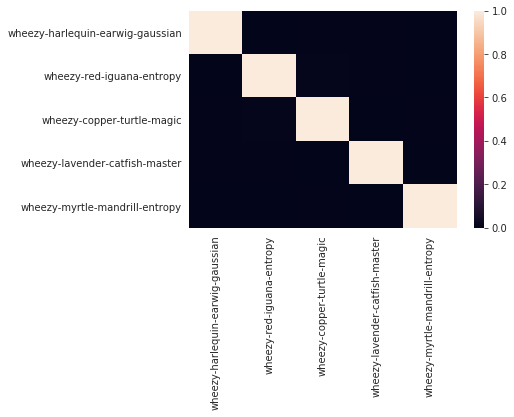

In [46]:
sns.heatmap(train[meta[(meta.col_name_1 == 'wheezy')].index].corr())

## Scatter Plots by features

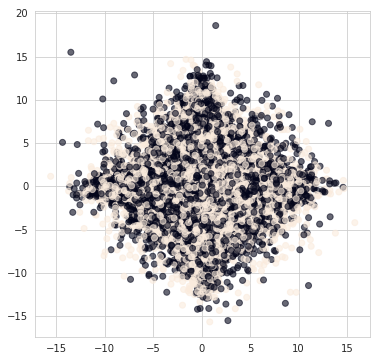

In [47]:
color = sns.color_palette()
plt.figure(figsize=(6,6))
plt.scatter(train[feats[0]], train[feats[1]], c=train.target, alpha = 0.6)

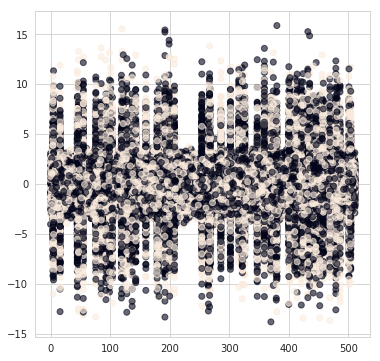

In [48]:
color = sns.color_palette()
plt.figure(figsize=(6,6))
plt.scatter(train['wheezy-copper-turtle-magic'], train['wheezy-harlequin-earwig-gaussian'], c=train.target, alpha = 0.6)

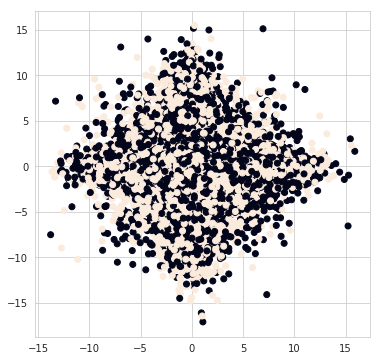

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(train['wheezy-harlequin-earwig-gaussian'], train['wheezy-red-iguana-entropy'], c=train.target)

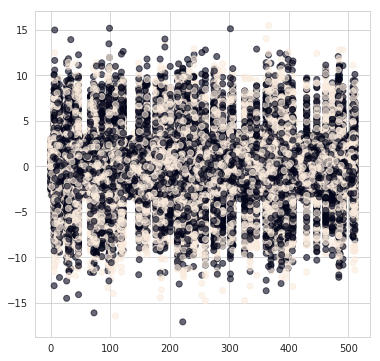

In [50]:
plt.figure(figsize=(6,6))
plt.scatter(train['wheezy-copper-turtle-magic'], train['wheezy-red-iguana-entropy'], c=train.target, alpha = 0.6)

- It seems like the magic feature is categorical